In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [10]:
df=pd.read_csv("C:\\Users\\parth\\OneDrive\\Desktop\\parth\\Machine-learning\\Machine-learning\\08-Linear-Regression-Models\\Advertising.csv")

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
X=df.drop('sales',axis=1)

In [13]:
y=df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [14]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [15]:
poly_features=polynomial_converter.transform(X)

In [16]:
# Polynomial regression karta kya woh like pairing ya phir jodi banta hai like we have tv,radio,newspaper
# phir tv aur radio jodke kitne sales hounge ya phir radio aur newspaper 
poly_features.shape

(200, 9)

In [17]:
X.shape

(200, 3)

In [18]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [20]:
poly_features[0] # observe pahile ke X1,X2,X3 hai 

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [22]:
230.1*37.8 # next three term are interaction term 

8697.779999999999

In [24]:
230.1**2 # square term  

52946.009999999995

# first Original term 
# Interaction term 
# Sqaure Term 

In [25]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

keep the same test sample because we have to check performance of the model linear or poly which one is best 

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
test_prediction=model.predict(X_test)

In [32]:
test_prediction

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [33]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
MAE=mean_absolute_error(y_test,test_prediction)

In [37]:
MSE=mean_squared_error(y_test,test_prediction)

In [38]:
RSME=np.sqrt(MSE)

In [39]:
MAE

0.48967980448037096

In [40]:
RSME

0.6646431757269152

In [41]:
model.coef_ # this are beta coefficient 

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [43]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [44]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

#Choosing of degree 

1. Create the different order poly 

2. split poly feat train/test 

3. fit on train 

4. store/save the rsme for both train and test 

5. plot the result (error vs poly order)

In [45]:
train_rsme_errors=[]
test_rsme_errors=[]

In [47]:
for d in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

    model=LinearRegression()
    model.fit(X_train,y_train)

    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)

    train_rsme=np.sqrt(mean_squared_error(y_train,train_predict))
    test_rsme=np.sqrt(mean_squared_error(y_test,test_predict))

    train_rsme_errors.append(train_rsme)
    test_rsme_errors.append(test_rsme) 
    

In [48]:
train_rsme_errors

[1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.421526785539996,
 0.14202305096575807,
 0.16722016522462252,
 1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.421526785539996,
 0.14202305096575807,
 0.16722016522462252]

In [49]:
test_rsme_errors

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.247040053768,
 4450.02249855719,
 95899.77715376193,
 1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.247040053768,
 4450.02249855719,
 95899.77715376193]

Now let's Visual it 

Text(0, 0.5, 'Errors in Rsme ')

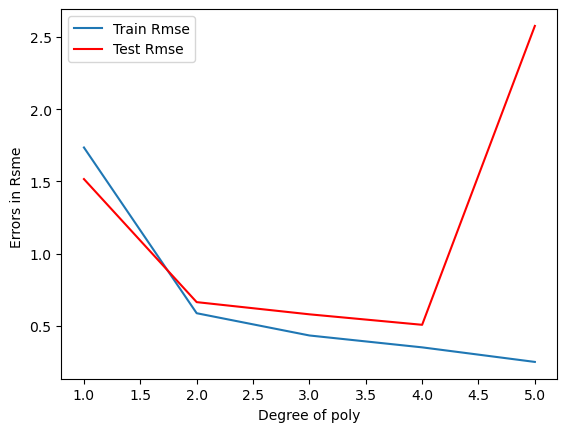

In [55]:
plt.plot(range(1,6),train_rsme_errors[:5],label='Train Rmse')
plt.plot(range(1,6),test_rsme_errors[:5],label='Test Rmse',color='red')
plt.legend()
plt.xlabel('Degree of poly')   # So which is the best degree for model performance well it can be 2 or 3 but 4 becuase 4 is like last point 
plt.ylabel('Errors in Rsme ')# consider like marks in exam it is passing mark so u have to perform more well to score good marks 
# u should not depend on the passing mark like that 4 is not good choice because afterwards error goes increase 

ValueError: x and y must have same first dimension, but have shapes (9,) and (18,)

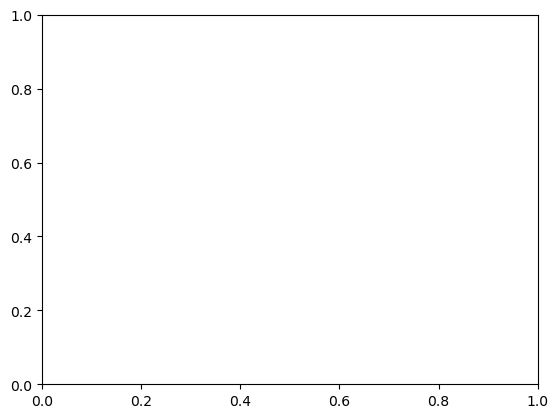

In [56]:
plt.plot(range(1,10),train_rsme_errors,label='Train Rmse')
plt.plot(range(1,10),test_rsme_errors,label='Test Rmse')
plt.legend()
plt.xlabel('Degree of poly')
plt.ylabel('Errors in Rsme ')

In [57]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [58]:
final_model=LinearRegression()

In [59]:
Fully_converted_X=final_poly_converter.fit_transform(X)
final_model.fit(Fully_converted_X,y)

LinearRegression()

In [60]:
from joblib import dump,load


In [61]:
dump(final_model,'Final_poly_model.joblib')

['Final_poly_model.joblib']

In [62]:
dump(final_poly_converter,'Final_converter.joblib')

['Final_converter.joblib']

In [64]:
loaded_converter=load('Final_converter.joblib')

In [65]:
loaded_model=load('Final_poly_model.joblib')

In [68]:
campaign=[[149,22,12]]
transform_data=loaded_converter.fit_transform(campaign) # we can't directly predict the sales first we have to convert it to that degree of the model
# then predict like we do in linear regression  

In [67]:
loaded_model.predict(transform_data)

array([14.64501014])